# Project: Descriptive analysis of Daikibo Factory Performance

In [1]:
# importing necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# setting pandas settings
pd.options.display.float_format='{:,.2f}'.format
pd.options.display.max_columns = 20

In [3]:
# loading the data
daikibo_telemetry_data = pd.read_json('daikibo-telemetry-data.json')
#viewing 
daikibo_telemetry_data.head()

,deviceID,deviceType,timestamp,location,data
0,19ff3161-2b3a-40a3-8604-bdc6532d0dab,CNC,2021-04-30 21:00:00,"{'country': 'japan', 'city': 'tokyo', 'area': ...","{'status': 'healthy', 'temperature': 27}"
1,19ff3161-2b3a-40a3-8604-bdc6532d0dab,CNC,2021-04-30 21:10:00,"{'country': 'japan', 'city': 'tokyo', 'area': ...","{'status': 'healthy', 'temperature': 27}"
2,19ff3161-2b3a-40a3-8604-bdc6532d0dab,CNC,2021-04-30 21:20:00,"{'country': 'japan', 'city': 'tokyo', 'area': ...","{'status': 'healthy', 'temperature': 26}"
3,19ff3161-2b3a-40a3-8604-bdc6532d0dab,CNC,2021-04-30 21:30:00,"{'country': 'japan', 'city': 'tokyo', 'area': ...","{'status': 'healthy', 'temperature': 24}"
4,19ff3161-2b3a-40a3-8604-bdc6532d0dab,CNC,2021-04-30 21:40:00,"{'country': 'japan', 'city': 'tokyo', 'area': ...","{'status': 'healthy', 'temperature': 27}"


In [4]:
country = []
city = []
area=[]
factory=[]
section =[]
status = []
temp= []

In [5]:
# seperating location data into columns
for location in daikibo_telemetry_data['location']:
    country.append(location['country'])
    city.append(location['city'])
    area.append(location['area'])
    factory.append(location['factory'])
    section.append(location['section'])
# seperating data column into multiple columns
for data in daikibo_telemetry_data['data']:
    status.append(data['status'])
    temp.append(data['temperature'])


In [6]:
# allocating the location and data information to new columns
daikibo_telemetry_data['country'] = country
daikibo_telemetry_data['city'] = city
daikibo_telemetry_data['area'] = area
daikibo_telemetry_data['factory'] = factory
daikibo_telemetry_data['section'] = section
daikibo_telemetry_data['status'] = status
daikibo_telemetry_data['temp'] =temp

In [7]:
# droping deviceID,location and data columns
daikibo_telemetry_data = daikibo_telemetry_data.drop(['deviceID','location', 'data'], axis=1)


In [8]:
daikibo_telemetry_data.head()

,deviceType,timestamp,country,city,area,factory,section,status,temp
0,CNC,2021-04-30 21:00:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,27
1,CNC,2021-04-30 21:10:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,27
2,CNC,2021-04-30 21:20:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,26
3,CNC,2021-04-30 21:30:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,24
4,CNC,2021-04-30 21:40:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,27


In [9]:
daikibo_telemetry_data['Year'] = daikibo_telemetry_data.timestamp.dt.year
daikibo_telemetry_data['month'] = daikibo_telemetry_data.timestamp.dt.month_name()
daikibo_telemetry_data['day'] = daikibo_telemetry_data.timestamp.dt.day
daikibo_telemetry_data['time'] = daikibo_telemetry_data.timestamp.dt.time

daikibo_telemetry_data.head()

,deviceType,timestamp,country,city,area,factory,section,status,temp,Year,month,day,time
0,CNC,2021-04-30 21:00:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,27,2021,April,30,21:00:00
1,CNC,2021-04-30 21:10:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,27,2021,April,30,21:10:00
2,CNC,2021-04-30 21:20:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,26,2021,April,30,21:20:00
3,CNC,2021-04-30 21:30:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,24,2021,April,30,21:30:00
4,CNC,2021-04-30 21:40:00,japan,tokyo,keiyō-industrial-zone,daikibo-factory-meiyo,section-1,healthy,27,2021,April,30,21:40:00


In [10]:
daikibo_telemetry_data['area'] =[x[0] for x in daikibo_telemetry_data.area.str.split('-')]
daikibo_telemetry_data['factory'] =[x[-1] for x in daikibo_telemetry_data.factory.str.split('-')]
daikibo_telemetry_data['section'] =[x[1] for x in daikibo_telemetry_data.section.str.split('-')]
daikibo_telemetry_data.head()

,deviceType,timestamp,country,city,area,factory,section,status,temp,Year,month,day,time
0,CNC,2021-04-30 21:00:00,japan,tokyo,keiyō,meiyo,1,healthy,27,2021,April,30,21:00:00
1,CNC,2021-04-30 21:10:00,japan,tokyo,keiyō,meiyo,1,healthy,27,2021,April,30,21:10:00
2,CNC,2021-04-30 21:20:00,japan,tokyo,keiyō,meiyo,1,healthy,26,2021,April,30,21:20:00
3,CNC,2021-04-30 21:30:00,japan,tokyo,keiyō,meiyo,1,healthy,24,2021,April,30,21:30:00
4,CNC,2021-04-30 21:40:00,japan,tokyo,keiyō,meiyo,1,healthy,27,2021,April,30,21:40:00


In [11]:
# checking basic info about the dataset
dk_td = daikibo_telemetry_data 
dk_td.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 160704 entries, 0 to 160703
Data columns (total 13 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   deviceType  160704 non-null  object        
 1   timestamp   160704 non-null  datetime64[ns]
 2   country     160704 non-null  object        
 3   city        160704 non-null  object        
 4   area        160704 non-null  object        
 5   factory     160704 non-null  object        
 6   section     160704 non-null  object        
 7   status      160704 non-null  object        
 8   temp        160704 non-null  int64         
 9   Year        160704 non-null  int64         
 10  month       160704 non-null  object        
 11  day         160704 non-null  int64         
 12  time        160704 non-null  object        
dtypes: datetime64[ns](1), int64(3), object(9)
memory usage: 15.9+ MB


In [12]:
# how many years are in the data
dk_td.Year.value_counts()

2021    160704
Name: Year, dtype: int64

In [13]:
#how many months are in our data
dk_td.month.value_counts()

May      158472
April      2232
Name: month, dtype: int64

In [14]:
# changing categorical status data to numeric
dk_td['unhealthy'] = [10 if x == 'unhealthy' else 0 for x in dk_td.status]

In [15]:
unhealthy = dk_td[~(dk_td['status']=='healthy')]
unhealthy.head()

,deviceType,timestamp,country,city,area,factory,section,status,temp,Year,month,day,time,unhealthy
5353,LaserCutter,2021-05-02 01:10:00,japan,tokyo,keiyō,meiyo,3,unhealthy,23,2021,May,2,01:10:00,10
5354,LaserCutter,2021-05-02 01:20:00,japan,tokyo,keiyō,meiyo,3,unhealthy,27,2021,May,2,01:20:00,10
5355,LaserCutter,2021-05-02 01:30:00,japan,tokyo,keiyō,meiyo,3,unhealthy,25,2021,May,2,01:30:00,10
7920,LaserCutter,2021-05-01 21:00:00,japan,tokyo,keiyō,meiyo,3,unhealthy,26,2021,May,1,21:00:00,10
33987,HeavyDutyDrill,2021-05-02 21:30:00,japan,tokyo,keiyō,meiyo,1,unhealthy,26,2021,May,2,21:30:00,10


### How many unhealthy statuses in the month of April compared to the month of May?

In [16]:
unhealthy[unhealthy['month']=='May']['status'].value_counts()

unhealthy    103
Name: status, dtype: int64

# 0 unhealthy status in April
# 103 unhealthy statuses in May

### Daikibo industries can investigate what caused the increase in the number of unhealthy statuses from 0 to 103. Was there a change in maintenance strategies or maintenance personnel or maybe new equipment was installed.

### Which factory had the most unhealthy statuses ?

In [17]:
sns.set_style('white')

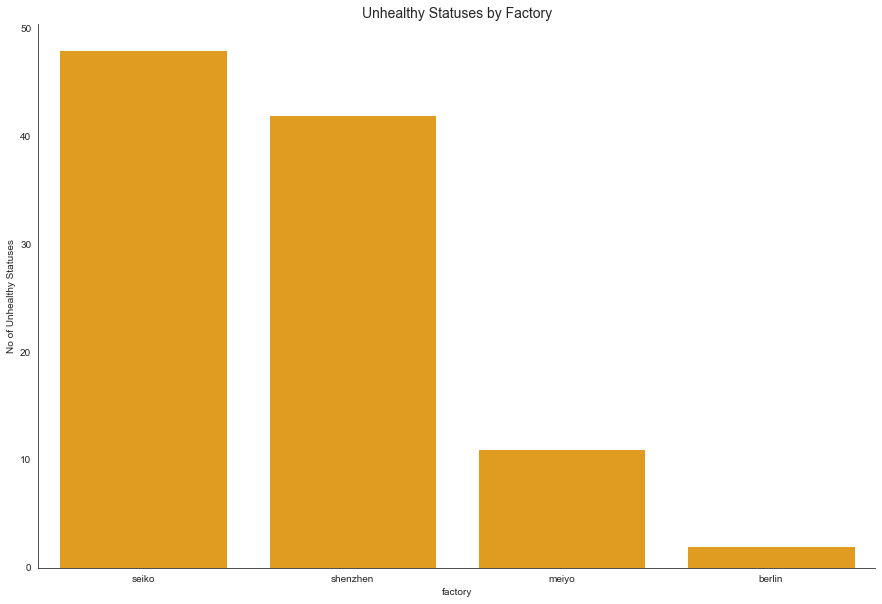

In [51]:
g= sns.countplot(x='factory', data=unhealthy, color="orange", order=['seiko','shenzhen','meiyo','berlin'], )
g.set_title('Unhealthy Statuses by Factory', fontdict= {'fontsize':14, 'horizontalalignment': 'center'})
g.set_ylabel('No of Unhealthy Statuses')
sns.despine()
plt.show()

### What days of the month did these unhealthy statuses occur?

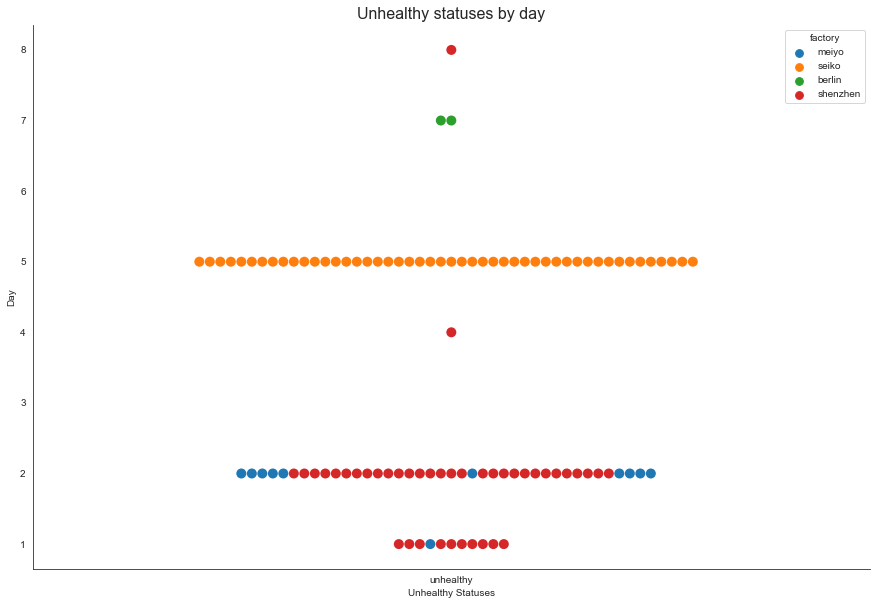

In [48]:
plt.rcParams['figure.figsize'] =(15,10)
g=sns.swarmplot(y='day', x='status', data=unhealthy, hue='factory', size=10, )
sns.despine()
g.set_xlabel('Unhealthy Statuses')
g.set_ylabel('Day')
g.set_title('Unhealthy statuses by day', fontsize=16)
plt.show()

# Unhealthy status by machine type

### Which machine had the most unhealthy statuses?

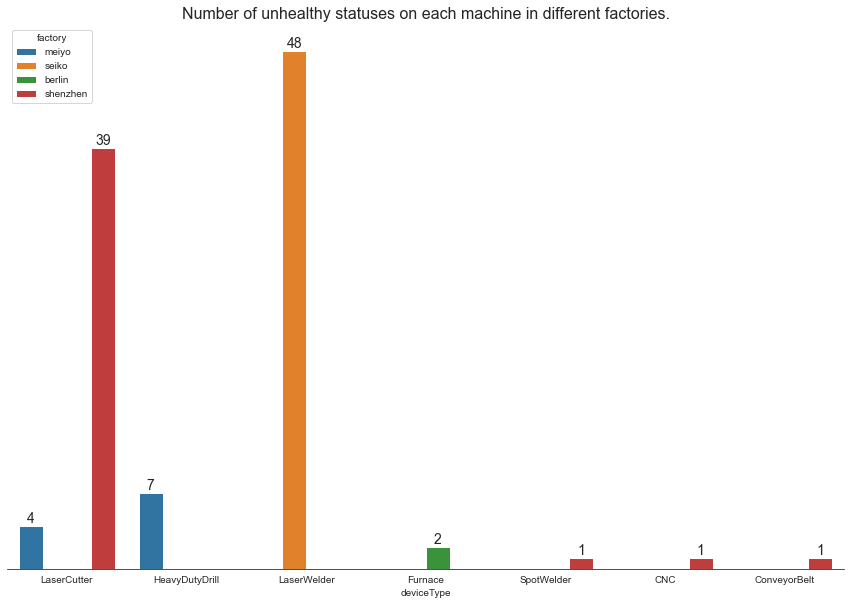

In [50]:
g=sns.countplot(x='deviceType', data=unhealthy, hue='factory')
sns.despine(left=True)
plt.tick_params(labelleft=False, left=False)
g.set(ylabel=None)
g.set_title('Number of unhealthy statuses on each machine in different factories.', fontsize=16)
for container in g.containers:
    g.bar_label(container, fontsize=14)
plt.show()

### Seiko factory had the highest number of unhealthy statuses(48), however, it can be observed that the unhealthy statys is only happening on one machine which is the Laser Welder. It can also be observed that shenzen with the second highest number of unhealthy statuses had more machines that experienced unhealthy statuses.